# A Game to Benchmark Quantum Computers

James R. Wootton, University of Basel

***

Games have a long history of being used to demonstrate the power of computational devices. Notable examples are the victories of Deep Blue, Watson and Deep Mind at games assumed to be the domain of human players. Inspired by this, we can look towards games to provide a framework in which the power of quantum computers can be demonstrated and studied.

Here we apply this idea to the study of the property known as ‘quantum computational supremacy’ or ‘quantum advantage’. The kinds of computational task proposed to achieve this in the near term are typically abstract and have no known applications. However, we show that they can be reinterpreted in terms of the definite and relatable computational task of gaming. Specifically, we apply this treatment to the recent proposal by Google.

This recasting of the underlying computational problem as a game has two main advantages. One is that the task of the Google proposal becomes the simplest of a family of tasks that could be performed with the game. The most difficult to implement tasks within this family would arguably require fault-tolerant quantum computation. This interpretation therefore suggests further experiments that could benchmark progress all the way to fully-fledged quantum computation.

The second advantange is that this method of benchmarking quantum computation has qualitative properties that can be easily understood by the public at large. Achieving quantum computational supremacy is something that will certainly attract a great deal of interest outside of the field. It could also affect the positioning of the field with respect to funding agencies and industry. It is therefore important that the result can be expressed in a way that does no overinflate expectations of near term devices. The game based interpretation will help to make it more straightforward to see the great progress that has been made, but also how much further there is to go.

### Introduction

The development of quantum computing is entering an exciting new era. Prototype quantum processors based on various physical architectures are beginning to appear, such as those superconducting qubits, trapped ions and spin qubits (see [2] for references) Such devices are too small and noisy to fully realize the promise of quantum computation. Many more qubits and the ability to achieve fault-tolerance are required before the age of quantum computers truly dawns.  Nevertheless, current and near future devices can and have been used to generate many significant proof-of-principle results.

An important challenge of this new era is to benchmark and compare quantum processors. A quantitative starting point for this is the 'Quantum Volume'[3], designed to capture not only the number of qubits in a device, but also some idea of the circuit depth that can be achieved before the effects of noise dominate.

More detail on the capabilities of a device can be obtained by running simple programs. An obvious choice would be to implement small instances of algorithms intended for large fault-tolerant devices, such as Shor's or Grover's algorithms. However, a better insight would arguably come from algorithms that have been specifically designed to work on small and noisy devices [2].

In this work we define a game to be played on near term devices. This is designed such that it can be adapted to any processor architecture. The game will work best for devices with low noise and highly connected architectures, which are the same conditions under which quantum computation flourishes in general. The game can therefore help give an accessible qualitative assessment of the capabilities of quantum devices. It will also allow quantitative analysis of how entanglement can be built up in the quantum processors, and how this compares to the build up of noise.

The game mechanic is based on the idea behind the experiment proposed by Google [1]. In that proposal, random quantum gates are implemented on a many qubit processor. This is done in a series of 'clock cycles', in which a set of gates are implemented simultaneously across the processor. Once enough random gates have been applied, the qubits can be expected to be in a very exotic state. If enough qubits are used (at least around 50), this could be used to generate random bit strings in a way that no normal computer ever could. This gives us a well defined computational task that could be done with near term devices, and which would achieve a proof-of-principle for the power of quantum computers.


### Basic definition of the game

The game proposed is more accurately a family of games, which can differ in certain details of implementation. Here we will sketch the main details common to all.

Like the Google proposal, the game is played on many qubit device with the qubits ideally arranged in a lattice. The game is played in a series of rounds. In the first, the player is presented with a puzzle: the outcome of a single clock cycle of a random circuit applied to an initial product state. The player is allowed access to a limited number of measurement results regarding the outcome of this circuit. Using this information, their task is to determine a set of gates that will act as an inverse to those applied.

Ideally, the player's moves would return the qubits to their initial state. The second round would then be identical in form to the first. However, this will not be the case due to the following reasons.

* The inverse gates are estimated using the measurement results. Due to numerical inaccuracies inevitable for any finite sample size, these will not be perfect.

* Players may make mistakes, leading to the attempted inverse gates that invert nothing. Instead, they only add to the number of gates and complexity of the state.

* The noise inherent in near term devices will build up during each clock cycle.

The result of these effects is to introduce spurious effects that make the puzzles harder to solve. These are referred to as *fuzz*. The fuzz builds up over the rounds, leading to increasing difficulty. Once the game has reached a point at which it is too too hard to play, the game ends.

The Google proposal is essentially has a particular choice of how random gates are chosen during each round. In the best case, in which fuzz builds up due only to coherent quantum effects, the Game Over condition is defined by reaching a particular set of highly entangled states. In the case in which fuzz is predominantly noise based, the game ends once everything becomes completely random.

Since Google did not envision their proposal as a game, they obviously do not allow players to make moves. Instead the game races to reach the Game Over point as quickly as possible. The aim is for the game to end due to the build up of entanglement, before succumbing to the ravages of noise. The aim is also to achieve this on a device large enough to prevent classical simulation. At this point, we can claim to have reached the point of *Quantum Computational Supremacy*, or *Quantum Advantage*.

With this game based intepretation, it becomes clear that achieving quantum computational supremacy is not a single monolithic event in the history of quantum computing. Instead, there are definite milestones to be achieved both before and after, such as making devices that can:

* **1.** Create a game that playable for a round or two;

* **2.** Reach Game Over due to predominantly quantum fuzz when the player is not able to move (or moves randomly);

* **3.** As **2**, but when the player is allowed to play intelligently.

* **4.** As **2**, but when the player is artificially allowed to make moves without mistakes.

These can be achieved first using devices for which the grid is of a non-trivial size, and then continue to sizes that are intractable for simulation on classical computers. Point **2** for an intractable size is the point of of quantum computational supremacy, while achieving **4**  for such a size will arguably require the qubits to be fault-tolerant, due to the slow build up of coherence when the player is allowed to behave perfectly.

### This implementation of the game

In the implementation of the game in this notebook, the random gates in each clock cyle are chosen in order to create puzzles that are easy to understand. This is done by first choosing a set of disjoint pairs of qubits (a matching). Each such pair should be one for which a cnot gate is possible.

For each pair of qubits $(j,k)$, a random value $0 \leq frac \leq 1$ is chosen. The following operation is then applied

    cx q[j], q[k];
    u3(frac * pi,0,0) q[j];
    cx q[j], q[k];
    
The initial state at the beginning of the game is that with $\left | \, 0 \right\rangle$ for each qubit. The application of the above operation will therefore yield the state

$$\cos(\, frac \, \pi \,) \left | \, 00 \right\rangle + \sin(\, frac \, \pi \,) \left | \, 11 \right\rangle$$
    
Each pair of qubits therefore becomes entangled with each other. The degree of entanglement depends on $frac$, with pairs being maximally entangled only if they have $frac=1$.

After the entangled pairs have been prepared, measurements of the resulting state are performed. These will be single qubit measurements, designed to determine how entangled each qubit is. The two qubits of each pair will be entangled to an equal degree. By looking at the measure of entanglement for each qubit, the player will therefore be able to determine how they are paired.

For a noiseless quantum computer in the first round, determining the pairing will be pretty trivial. In all other cases, fuzz will make the puzzle a little harder to solve. Therein lies the challenge. Once the player has determined the pairs, the value of $frac$ for that pair is inferred from the measurement results. Each round then ends by applying these (attempted) inverses.

Note that the random set of gates used in the game described above are not universal for quantum computation. To achieve universality without changing gameplay, additional single qubit rotations can be added after the entangling process. This will not change how much the qubits are entangled. It will change only the manner of their entanglement. the players may therefore use the entanglement to identify pairs as before. However, to fully determine the inverse, it is no longer sufficient just to infer the value of $frac$. Two qubit correlations on each pair will also be required to determine which single qubit rotations were applied such that they too can be inverted.

In the implementation in this notebook, we consider the simpler version of the game without the additional single qubit unitaries. Because of this limited set of gates, a full measure of entanglement for each qubit need not be made. Instead, the measurements made in each round are simply Z basis measurements of the qubits. The information given to the player is the percentage of times the result $1$ occurred for each qubit.

For both highly entangled states and heavily decohered states, this percentage will be around 50%. This is used to define the a measure of fuzz, and also the *Game Over* condition. The fuzz of the a puzzle is defined as

$$fuzz = \sum_j 2\times \left( \, 0.5-|\,P_1(\,j\,)-0.5\,| \, \right) /\, num$$.

Here the sum is over all qubits, $num$ is the number of qubits and $P_1(\,j\,)$ is the fraction of times that the outcome $1$ occurred for qubit $j$. This comes out as $fuzz=1$ when $P_1(\,j\,)=0.5$ in all cases, and $fuzz=0$ when each $P_1(\,j\,)$ is either $0$ or $1$. It is therefore maximum for maximally entangled or mized states, and minimum for pure product states. The game ends once $fuzz \geq 0.9$, though the game arguably becomes unplayable before this point.


**Results for ibmqx3**

This implementation of the game is tailored to the largest publicly available quantum processor: *ibmqx3*. This is a 16 qubit device on a 2x8 square lattice.

    [1]---(A)---[2]---(B)---[3]---(C)---[4]---(D)---[5]         [6]---(E)---[7]---(F)---[8]
     |                       |           |           |           |           |           |
    (G)                     (H)         (I)         (J)         (K)         (L)         (M)
     |                       |           |           |           |           |           |
    [0]---(N)--[15]---(0)--[14]---(P)--[13]---(Q)--[12]---(R)--[11]---(S)--[10]---(T)---[9]
    
The above diagram shows the numbering of the qubits. Links (labelled by letters) represent possible pairs of qubits on which a cnot can be performed.

Games have been run for two types of player behaviour: one in which the player always chooses moves randomly, and one in which the player always moves correctly. These were done with two possible values for the number of samples used in the measurements: 1024 and 8192. Ten samples were taken for each case. The results for the 1024 runs are below. The results for the 8192 runs were not qualitatively different.

In [1]:
 def graphPlot (numRounds,F,f,title):   
    rounds = range(1,numRounds+1)
    from matplotlib import pyplot as plt
    plt.rcParams.update({'font.size': 20})
    labels = ["total","from noise"]
    plt.figure(figsize=(10,5))
    for j in[0,1]:
        plt.errorbar(rounds, F[j], yerr= f[j], label=labels[j], linewidth=5)
    plt.legend(loc='lower right')
    plt.xlabel('Round')
    plt.ylabel('Average fuzz')
    plt.title(title)
    plt.show()

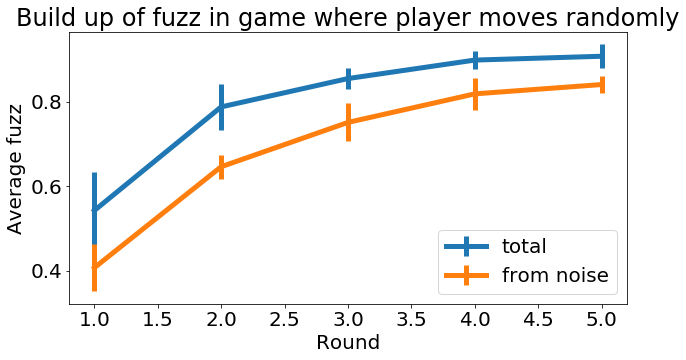

In [2]:
# average fuzz over the first five rounds from 10 samples [totalFuzz,noiseFuzz]
F = [[0.542333984,0.787487793,0.854589844,0.898291016,0.907348633],[0.406958008,0.64597168,0.750842285,0.818371582,0.840423584]]
# stdev of the above
f = [[0.091892955,0.053672745,0.023833136,0.021181128,0.028141907],[0.055980676,0.02802664,0.045002278,0.037464449,0.01988919]]

graphPlot(5,F,f,"Build up of fuzz in game where player moves randomly")

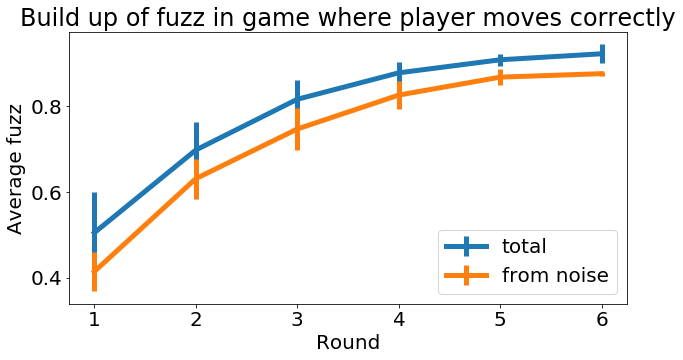

In [3]:
# average fuzz over the first five rounds from 10 samples [totalFuzz,noiseFuzz]
F = [[0.504724121,0.697949219,0.816491699,0.878283691,0.908752441,0.922790527],[0.414074707,0.631091309,0.747021484,0.826293945,0.868225098,0.876342773]]
# stdev of the above
f = [[0.094783561,0.066438585,0.045157915,0.024841863,0.013654581,0.02201077],[0.046393516,0.046854914,0.049468364,0.032435195,0.019315674,0.005006371]]

graphPlot(6,F,f,"Build up of fuzz in game where player moves correctly")

From this we see that the build up of fuzz for *ibmqx3* is dominated by noise. From playing manually we can find that the first round or two are quite playable, but those thereafter seem quite impossible to correctly determine the pairs. We therefore find that *ibmqx3* reaches step **1** of the journey towards a fully fledged quantum computer.

### Conclusions

We have defined a computational task for near term quantum devices. This aims to provide an accessible and relatable way of benchmarking progress towards quantum computation. It confirms what we already know: that current devices such as those of IBM are at an early stage, but still very much able to run well defined and interesting processes. 

Our interpretation shows that a successful experiment of the form proposed by Google for quantum computational supremacy would represent a much advanced stage, making it seem unlikely that such a device will be ready this year (though it would be nice to be suprised). Our interpretation allows us to propose a set of milestones that will bridge the gap over the next few years, as well as further milestones to bridge the larger gap between a quantum computational supremacy result and the beginning of fully fledged quantum computing.

### Future work

This work is still in progress. The most recent version can be found at [5]. The game will be further developed to ensure that a universal set of gates are applied, as in the original Google proposal. Support for Project Q [4] will also be added, to prepare for runs on non-IBM devices. Particularly interesting would be to run the game on Google's new 22 qubit device, and compare this to *ibmqx3*.


### References

1. [S. Boixo, et al., arXiv:1608.00263 2016](https://arxiv.org/abs/1608.00263)
2. [J. R. Wootton and D. Loss, arXiv:1709.00990](https://arxiv.org/abs/1709.00990)
3. [L. Bishop, YouTube video (2017)](https://www.youtube.com/watch?v=-7L5o-mzLqU)
4. [D. S. Steiger, T. Häner, M. Troyer, arXiv:1612.08091](https://arxiv.org/abs/1612.08091)
5. [J. R. Wootton, GitHub repository "A Game to Benchmark Quantum Computers"](https://github.com/decodoku/A_Game_to_Benchmark_Quantum_Computers)

***

## The Game

The following program is written using QISKit. The path (in the cell below) assumes that the folder holding this file is a subfolder of qiskit-tutorial/5_Games.

The output from a game run on *ibmqx3* is shown at the bottom as an example. Some commentary on this can be found [here](https://medium.com/@decodoku/how-good-are-todays-quantum-computers-really-896488e0b701).

In [4]:
# The imports

import random, math, time, copy
# We'll need a bit of perfect matching, for which I use an implementation found at
# http://jorisvr.nl/article/maximum-matching
import mwmatching as mw

import sys
sys.path.append("../../../qiskit-sdk-py/")
from qiskit import QuantumProgram
import Qconfig

In [5]:
def getDisjointPairs (pairs):
    # Input:
    #    pairs: A dictionary of possible pairs.
    # Process:
    #    A set of edges is defined with random weights, which are then max weight matched
    # Output:
    #    A random list of disjoint pairs included in the matching.
    
    edges = []
    for p in pairs.keys():
        edges.append( (pairs[p][0], pairs[p][1], random.randint(0,100) ) )
    
    # match[j] = k means that edge j and k are matched
    match = mw.maxWeightMatching(edges, maxcardinality=True)

    # get a list of the pair names for each pair in the matching
    matchingPairs = []
    for v in range(len(match)):
        for p in pairs.keys():
            if (pairs[p]==[v,match[v]]):
                matchingPairs.append(p)
                
    return matchingPairs

In [6]:
def printGrid(E):
    # Input:
    #    E: A list of 16 strings, one for each qubit
    # Process:
    #    The function prints the grid to screen, with the strings in their respective places.
    # Output:
    #    Nothing is returned.
    
    print("")
    print("   "+E[1]+"---(A)---"+E[2]+"---(B)---"+E[3]+"---(C)---"+E[4]+"---(D)---"+E[5]+"         "+E[6]+"---(E)---"+E[7]+"---(F)---"+E[8]+"")
    print("    |                       |           |           |           |           |           |")
    print("   (G)                     (H)         (I)         (J)         (K)         (L)         (M)")
    print("    |                       |           |           |           |           |           |")
    print("   "+E[0]+"---(N)---"+E[15]+"---(O)---"+E[14]+"---(P)---"+E[13]+"---(Q)---"+E[12]+"---(R)---"+E[11]+"---(S)---"+E[10]+"---(T)---"+E[9]+"")
    print("")

In [7]:
def calculateFuzz(oneProb):
    # Input:
    #    oneProb: A list of oneProbs
    # Process:
    #    Calculates the fuzz, which comes from an average calculates from oneProbs.
    #    This average is defined to come out as 1 if all oneProbs are 0.5, and 0 if each is either 0 or 1.
    # Output:
    #    The quantity described above.
    
    
    fuzzSum = 0
    for prob in oneProb:
        fuzzSum += 2*( 0.5-abs(prob-0.5) )
        
    return fuzzSum/len(oneProb)

In [8]:
def prepareGrid(oneProb):
    # Input:
    #    oneProb: A list of oneProbs
    # Output:
    #    E: A list of oneProbs turned into two digit percentanges as strings
    
    # prepare oneProbs as percentanges for printing to screen
    E = [""]*num
    for n in range(num):
        perc = round( 100*oneProb[n] )
        if perc<10:
            E[n] = " " + str(perc)[0] + "%"
        elif perc>=100:
            E[n] = "99%"
        else:
            E[n] = str(perc)[0] + str(perc)[1] + "%"
            
    return E

In [9]:
def entangle(pairs,matchingPairs,gates,device,shots,perfect=False):
    # Input:
    #    pairs: Dictionary of all possible pairs for which a CNOT can be performed and their names (control listed first)
    #    matchingPairs: Set of disjoint pairs
    #    gates: List of all gates applied so far. Two entries for each level.
    #    device: device
    #    shots: shots
    # Process:
    #    Sets up and runs a quantum circuit consisting of all gates thus far.
    # Output:
    #    oneProb: The fraction of times that the measurement returns 1 for each qubit (as a list of 16 elements)
    
    # now to set up the quantum program (QASM)
    Q_program = QuantumProgram()
    Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url
    # declare register of 5 qubits
    q = Q_program.create_quantum_register("q", 16)
    # declare register of 5 classical bits to hold measurement results
    c = Q_program.create_classical_register("c", 16)
    # create circuit
    puzzleScript = Q_program.create_circuit("puzzleScript", [q], [c])   
        
        
    # apply all gates
    # gates has two entries for each level, which we call slices
    for s in range(len(gates)):
        
        # if perfect=True is chosen, each odd slice is a perfect inverse of the one before
        if (perfect and (s%2)==1):
            gateSlice = copy.deepcopy( gates[s-1] )
            for p in gateSlice.keys():
                gateSlice[p] = -gateSlice[p]
        # otherwise it is as chosen by the player
        else:
            gateSlice = gates[s]
        
        for p in gateSlice.keys():
        
            frac = gateSlice[p]
        
            # first cnot
            puzzleScript.cx(q[ pairs[p][0] ], q[ pairs[p][1] ])

            # X rotation on control
            puzzleScript.u3(frac * math.pi, 0.0, 0.0, q[ pairs[p][0] ])

            # second cnot
            puzzleScript.cx(q[ pairs[p][0] ], q[ pairs[p][1] ])
            
        # barriers are put in on real device to force all gates to actually happen
        if (device=='ibmqx3'):
            puzzleScript.barrier()

    # finally, all is measured
    for v in range(num):       
        puzzleScript.measure(q[v], c[v])
    
    # run the job until actual results are given
    dataNeeded = True
    while dataNeeded:
        
        try:

            # compile and run the qasm
            executedJob = Q_program.execute(["puzzleScript"], backend=device, shots = shots, max_credits = 5, wait=2, timeout=600, silent=False)
            
            # extract data
            results = executedJob.get_counts("puzzleScript")# {'0000000000000000': shots} # fake results for debugging

            # see if it really is data
            if ('status' not in results.keys()):
                dataNeeded = False
            # if not, wait half a minute before trying again
            else:
                time.sleep(30)
        except:
            # wait five minutes before trying again
            time.sleep(300)

            
    # determine the fraction of results that came out as 1 (instead of 0) for each qubit
    oneProb = [0]*num
    for bitString in results.keys():
        for v in range(16):
            if (bitString[15-v]=="1"):
                oneProb[v] += results[bitString]/shots
    
    return oneProb

In [ ]:
def runGame():
    # Input:
    #    none, though global variables such as num, shots, device and move are used
    # Process:
    #    Run the game!
    # Output:
    #    score: score reached by the player at game over
    #    gates: list of all gates applied so far. Two entries for each level.
    #    totalFuzz: the fuzz for each level (see calculateFuzz)
    #    noiseFuzz: the fuzz due only for noise due to each level
    
    
    # the positions of qubits on the device (numbers), and names of pairs (letters).
    #    [1]---(A)---[2]---(B)---[3]---(C)---[4]---(D)---[5]         [6]---(E)---[7]---(F)---[8]
    #     |                       |           |           |           |           |           |
    #    (G)                     (H)         (I)         (J)         (K)         (L)         (M)
    #     |                       |           |           |           |           |           |
    #    [0]---(N)--[15]---(0)--[14]---(P)--[13]---(Q)--[12]---(R)--[11]---(S)--[10]---(T)---[9]

    # list of pairs with name as key and a list of the two qubits as value
    # the qubits are listed as [control,target] for the corresponding CNOT
    pairs = {'A': [1,2], 'B': [2,3], 'C': [4,3], 'D': [4,5], 'E': [6,7], 'F': [8,7], 
             'G': [0,1], 'H': [3,14], 'I': [13,4], 'J': [12,5], 'K': [6,11], 'L': [7,10], 'M': [9,8], 
             'N': [15,0], 'O': [15,14], 'P': [13,14], 'Q': [12,13], 'R': [12,11], 'S': [11,10], 'T': [9,10]}

    gates = []
    gameOn = True
    score = 0
    totalFuzz = []
    noiseFuzz =[]
    runTime = []
    while gameOn:

        score += 1
        
        # Step 1: generate a new set of gates

        # gates applied are of the form
        # cx(j,k)
        # u3(frac*pi,0,0, j)
        # cx(j,k)
        # and so are specified by a pair p=[j,k] and a random fraction frac

        # first we generate a random set of edges
        matchingPairs = getDisjointPairs(pairs)

        # then we add gates these to the list of gates
        appliedGates = {}
        for p in matchingPairs:
            frac = random.random() # random fraction is chosen here
            appliedGates[p] = frac
        gates.append(appliedGates)
        
        # all gates so far are then run (and the execution is timed
        startTime = time.time()
        oneProb = entangle(pairs,matchingPairs,gates,device,shots)
        runTime.append( time.time() - startTime )

        # prepare grid for the first (or only) time and print to screen
        print("")
        if (move=="M"):
            print("Round "+str(score) )
        else:
            print("")
        E = prepareGrid(oneProb)
        printGrid( E )
        
        
        # Step 2: Get player to guess pairs

        guessedPairs = []

        # if choices are all correct, we just give the player the right answer
        if (move=="C"):
            guessedPairs = matchingPairs
        # if choices are random, we generate a set of random pairs
        if (move=="R"):
            guessedPairs = getDisjointPairs(pairs)
        # if choices are manual, let's get choosing
        if (move=="M"):

            # then get the player choosing until the choosing is done
            allGone = False
            while (allGone==False):  

                pairGuess = str.upper(input("\nChoose a pair\n"))

                if (pairGuess in pairs.keys()) and (pairGuess not in guessedPairs) :

                    guessedPairs.append(pairGuess)

                    # get the two vertices for this pair
                    vertex = [0,0]
                    for j in [0,1]:
                        vertex[j] = pairs[pairGuess][j]

                    # set them both to * on screen
                    for j in [0,1]:
                        E[ vertex[j] ] = " * "
                    print("\n\n\n")

                else:
                    print("That isn't a valid pair. Try again.")

                # check if all vertices have been covered
                allGone = True
                for n in range(num):
                    allGone = allGone and (E[n] == " * ")
            
                printGrid( E )  

        # given the chosen pairs, the gates are now deduced from oneProb

        guessedGates = {}

        for pairGuess in guessedPairs:

            # get the two vertices for this pair
            vertex = [0,0]
            for j in [0,1]:
                vertex[j] = pairs[pairGuess][j]

            guessedOneProb = ( oneProb[vertex[0]] + oneProb[vertex[1]] )/2
            # Prob(1) = sin(frac*pi/2)^2
            # therefore frac = asin(sqrt(E)) *2 /pi
            guessedFrac = math.asin(math.sqrt(guessedOneProb)) * 2 / math.pi

            # since the player wishes to apply the inverse gate, the opposite frac is stored
            guessedGates[pairGuess] = -guessedFrac

        # now we can add to the list of all gates
        gates.append(guessedGates)

        # get the fuzz for this level
        totalFuzz.append( calculateFuzz( oneProb ) )
        
        # see whether the game over condition is satisfied (totalFuzz for this level > 0.9)
        gameOn = (totalFuzz[-1] < 0.9)
        # we'll also end the game if it is simulated and is taking too long (more than 10 mins)
        if (device!='ibmqx3'):
            gameOn = gameOn and (runTime[-1]<300)    
        
        
        # then run again with perfect inverses to see how much of the fuzz comes from noise
        # no need to bother if it is simulated, though
        if (device=='ibmqx3'):
            perfectOneProb = entangle(pairs,matchingPairs,gates,device,shots,perfect=True)
            noiseFuzz.append( calculateFuzz( perfectOneProb ) )
        else:
            noiseFuzz.append( 0 )
        
        print("")
        print("")
        print("Fuzz for this round")
        print("Total fuzz: "+str( totalFuzz[-1] ) )
        print("Noise fuzz: "+str( noiseFuzz[-1] ) )
        print("")
        print("")
        
    print("Game Over! Final score: " + str(score) + "\n")
    
    return score, gates, runTime, totalFuzz, noiseFuzz

In [ ]:
print("")
print("")
print("             +-+-+-+-+-+-+-+     ") 
print("             |Q|u|a|n|t|u|m|     ") 
print("         +-+-+-+-+-+-+-+-+-+-+-+ ") 
print("         |A|w|e|s|o|m|e|n|e|s|s| ") 
print("         +-+-+-+-+-+-+-+-+-+-+-+ ") 
print("         |b|y| |D|e|c|o|d|o|k|u| ") 
print("         +-+-+ +-+-+-+-+-+-+-+-+ ")
print("")
print("            James R. Wootton")
print("           University of Basel")
print("")
input("> Press Enter to continue...\n")
print("")
print("In this games you will see a grid like this.")
print("")
print("    9%---(A)---49%---(B)---52%---(C)---31%---(D)---89%         15%---(E)---18%---(F)---47%")
print("    |                       |           |           |           |           |           |")
print("   (G)                     (H)         (I)         (J)         (K)         (L)         (M)")
print("    |                       |           |           |           |           |           |")
print("   11%---(N)---73%---(O)---77%---(P)---29%---(Q)---93%---(R)---62%---(S)---67%---(T)---43%")
print("")
print("The numbers come in pairs that are almost equal. Your job is to find those pairs.")
print("The more rounds you play, the more the two numbers from each pair will diverge, making the puzzle harder to solve.")
print("If you make mistakes in one round, these will make the following rounds even harder.")
print("Try to survive for as many rounds as you can.")
print("")
input("> Press Enter to continue...\n")


# set the number of qubits
num = 16

# ask player what device to use
d = str.upper(input("\nDo you want to play on the real device? (y/n)\n"))
if (d=="Y"):
    device = 'ibmqx3'
else:
    device = 'ibmqx_qasm_simulator'

# ask player how many shots to use
s = str.upper(input("\nDo you want to play on hard (H) or easy (E)?\n\n"+
                    "This sets the number of shots used in each run.\n\n"+
                    "Using 8192 shots makes the numbers and inverses more accurate than when 1024 is used.\n\n"))
if (s=="E"):
    shots = 8192
else:
    shots = 1024
    
# ask player how moves should be chosen
move = str.upper(input("\nWill the player choose moves manually (M), randomly (R) or correctly (C)?\n"))
# if the input isn't one of the three allowed options, it is set as "M"
if (move not in ["R","C"]):
    move = "M"
print("")

# set number of sample games for chosen parameters
samples = 10

# for these samples...
results = []
for j in range(samples):
    
    # ... run the game and find the final score and all gates and average oneProbs
    score, gates, runTime, totalFuzz, noiseFuzz = runGame()
    
    # save results
    saveFile = open('results_for_device=' + device + '_move=' + move + '_shots=' + str(shots) + '_at ' + time.strftime("%c") + '.txt', 'a')
    saveFile.write("score\n")
    saveFile.write(str(score) + "\n")
    saveFile.write("\nrunTime\n")
    for gameTime in runTime:
        saveFile.write(str(gameTime) + "\n")
    saveFile.write("\ntotalFuzz\n")
    for fuzz in totalFuzz:
        saveFile.write(str(fuzz) + "\n")
    saveFile.write("\nnoiseFuzz\n")
    for fuzz in noiseFuzz:
        saveFile.write(str(fuzz) + "\n")
    saveFile.write("\ngates\n")
    for slice in gates:
        saveFile.write(str(slice) + "\n")



             +-+-+-+-+-+-+-+     
             |Q|u|a|n|t|u|m|     
         +-+-+-+-+-+-+-+-+-+-+-+ 
         |A|w|e|s|o|m|e|n|e|s|s| 
         +-+-+-+-+-+-+-+-+-+-+-+ 
         |b|y| |D|e|c|o|d|o|k|u| 
         +-+-+ +-+-+-+-+-+-+-+-+ 

            James R. Wootton
           University of Basel

> Press Enter to continue...


In this games you will see a grid like this.

    9%---(A)---49%---(B)---52%---(C)---31%---(D)---89%         15%---(E)---18%---(F)---47%
    |                       |           |           |           |           |           |
   (G)                     (H)         (I)         (J)         (K)         (L)         (M)
    |                       |           |           |           |           |           |
   11%---(N)---73%---(O)---77%---(P)---29%---(Q)---93%---(R)---62%---(S)---67%---(T)---43%

The numbers come in pairs that are almost equal. Your job is to find those pairs.
The more rounds you play, the more the two numbers from each pair will diverge, makin